# Data Analyst Nanodegree by Udacity
# Project 7 - Wrangle and Analyze Data

In this Project data will be gathered from different sources (csv file, using request to get a file from the web and twitters API) and assessed and cleaned for several issues found.


In [183]:
# prepare Python
import pandas as pd
import requests
import tweepy
import json
import numpy as np

## Data Wrangling
### Gather

twitter_archive_enhanced.csv upload to dashboard

In [184]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


image_predictions.tsv get from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using request

In [185]:
# download file from web and store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [186]:
# load tsv file as a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [4]:
#Twitter API credentials
# this is to be deleted or masked before handing in the report
consumer_key = 'gHYzg1zhpOg6qesH4w5f8Z1NN'
consumer_secret = 'Rv9eJqnMf4JBvkVNmYZqgnrfcY5gspo2WOKAYKkEXwjoNMdt56'
access_token = '1008069121458786304-YFjvenum0MltxuIkLJvdk0tNagxzTl'
access_secret = 'yki8EyqkwG4vA58UdBKVFTHeycjyLJ4znOuWPg6zFyYdw'

# programmatic log in to twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
#public_tweets = api.search('dog_rates')
#for tweet in public_tweets:
#    print(tweet.text)

In [27]:
# use tweet IDs of 'twitter_archive'df to query API for each tweet's JSON data
# store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
# Each tweet's JSON data should be written to its own line.
tweet_id_list = twitter_archive['tweet_id']#[0:5]

tweet_list = []
failed_tweet_ids =[]

with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in tweet_id_list:
        try: 
            print('get tweet {}'.format(tweet_id))
            tweet = api.get_status(tweet_id, tweet_mode='extended', 
                                   wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            tweet_list.append(tweet._json)
            json.dump(tweet._json, file)
            file.write('\n')
            print('{} stored'.format(tweet_id))
        except:
            failed_tweet_ids.append(tweet_id)
            print('ERROR: failed to store {}'.format(tweet_id))
            continue

get tweet 892420643555336193
892420643555336193 stored
get tweet 892177421306343426
892177421306343426 stored
get tweet 891815181378084864
891815181378084864 stored
get tweet 891689557279858688
891689557279858688 stored
get tweet 891327558926688256
891327558926688256 stored
get tweet 891087950875897856
891087950875897856 stored
get tweet 890971913173991426
890971913173991426 stored
get tweet 890729181411237888
890729181411237888 stored
get tweet 890609185150312448
890609185150312448 stored
get tweet 890240255349198849
890240255349198849 stored
get tweet 890006608113172480
890006608113172480 stored
get tweet 889880896479866881
889880896479866881 stored
get tweet 889665388333682689
889665388333682689 stored
get tweet 889638837579907072
889638837579907072 stored
get tweet 889531135344209921
889531135344209921 stored
get tweet 889278841981685760
889278841981685760 stored
get tweet 888917238123831296
888917238123831296 stored
get tweet 888804989199671297
888804989199671297 stored
get tweet 

863079547188785154 stored
get tweet 863062471531167744
863062471531167744 stored
get tweet 862831371563274240
862831371563274240 stored
get tweet 862722525377298433
862722525377298433 stored
get tweet 862457590147678208
862457590147678208 stored
get tweet 862096992088072192
862096992088072192 stored
get tweet 861769973181624320
ERROR: failed to store 861769973181624320
get tweet 861383897657036800
861383897657036800 stored
get tweet 861288531465048066
861288531465048066 stored
get tweet 861005113778896900
861005113778896900 stored
get tweet 860981674716409858
860981674716409858 stored
get tweet 860924035999428608
860924035999428608 stored
get tweet 860563773140209665
860563773140209665 stored
get tweet 860524505164394496
860524505164394496 stored
get tweet 860276583193509888
860276583193509888 stored
get tweet 860184849394610176
860184849394610176 stored
get tweet 860177593139703809
860177593139703809 stored
get tweet 859924526012018688
859924526012018688 stored
get tweet 8598515781986

836989968035819520 stored
get tweet 836753516572119041
836753516572119041 stored
get tweet 836677758902222849
836677758902222849 stored
get tweet 836648853927522308
836648853927522308 stored
get tweet 836397794269200385
836397794269200385 stored
get tweet 836380477523124226
836380477523124226 stored
get tweet 836260088725786625
836260088725786625 stored
get tweet 836001077879255040
836001077879255040 stored
get tweet 835685285446955009
835685285446955009 stored
get tweet 835574547218894849
835574547218894849 stored
get tweet 835536468978302976
835536468978302976 stored
get tweet 835309094223372289
835309094223372289 stored
get tweet 835297930240217089
835297930240217089 stored
get tweet 835264098648616962
835264098648616962 stored
get tweet 835246439529840640
835246439529840640 stored
get tweet 835172783151792128
835172783151792128 stored
get tweet 835152434251116546
835152434251116546 stored
get tweet 834931633769889797
834931633769889797 stored
get tweet 834786237630337024
8347862376

819004803107983360 stored
get tweet 818646164899774465
818646164899774465 stored
get tweet 818627210458333184
818627210458333184 stored
get tweet 818614493328580609
818614493328580609 stored
get tweet 818588835076603904
818588835076603904 stored
get tweet 818536468981415936
818536468981415936 stored
get tweet 818307523543449600
818307523543449600 stored
get tweet 818259473185828864
818259473185828864 stored
get tweet 818145370475810820
818145370475810820 stored
get tweet 817908911860748288
817908911860748288 stored
get tweet 817827839487737858
817827839487737858 stored
get tweet 817777686764523521
817777686764523521 stored
get tweet 817536400337801217
817536400337801217 stored
get tweet 817502432452313088
817502432452313088 stored
get tweet 817423860136083457
817423860136083457 stored
get tweet 817415592588222464
817415592588222464 stored
get tweet 817181837579653120
817181837579653120 stored
get tweet 817171292965273600
817171292965273600 stored
get tweet 817120970343411712
8171209703

798686750113755136 stored
get tweet 798682547630837760
798682547630837760 stored
get tweet 798673117451325440
798673117451325440 stored
get tweet 798665375516884993
798665375516884993 stored
get tweet 798644042770751489
798644042770751489 stored
get tweet 798628517273620480
798628517273620480 stored
get tweet 798585098161549313
798585098161549313 stored
get tweet 798576900688019456
798576900688019456 stored
get tweet 798340744599797760
798340744599797760 stored
get tweet 798209839306514432
798209839306514432 stored
get tweet 797971864723324932
797971864723324932 stored
get tweet 797545162159308800
797545162159308800 stored
get tweet 797236660651966464
797236660651966464 stored
get tweet 797165961484890113
797165961484890113 stored
get tweet 796904159865868288
796904159865868288 stored
get tweet 796865951799083009
796865951799083009 stored
get tweet 796759840936919040
796759840936919040 stored
get tweet 796563435802726400
796563435802726400 stored
get tweet 796484825502875648
7964848255

779377524342161408 stored
get tweet 779124354206535695
779124354206535695 stored
get tweet 779123168116150273
779123168116150273 stored
get tweet 779056095788752897
779056095788752897 stored
get tweet 778990705243029504
778990705243029504 stored
get tweet 778774459159379968
778774459159379968 stored
get tweet 778764940568104960
778764940568104960 stored
get tweet 778748913645780993
778748913645780993 stored
get tweet 778650543019483137
778650543019483137 stored
get tweet 778624900596654080
778624900596654080 stored
get tweet 778408200802557953
778408200802557953 stored
get tweet 778396591732486144
778396591732486144 stored
get tweet 778383385161035776
778383385161035776 stored
get tweet 778286810187399168
778286810187399168 stored
get tweet 778039087836069888
778039087836069888 stored
get tweet 778027034220126208
778027034220126208 stored
get tweet 777953400541634568
777953400541634568 stored
get tweet 777885040357281792
777885040357281792 stored
get tweet 777684233540206592
7776842335

759099523532779520 stored
get tweet 759047813560868866
759047813560868866 stored
get tweet 758854675097526272
758854675097526272 stored
get tweet 758828659922702336
758828659922702336 stored
get tweet 758740312047005698
758740312047005698 stored
get tweet 758474966123810816
758474966123810816 stored
get tweet 758467244762497024
758467244762497024 stored
get tweet 758405701903519748
758405701903519748 stored
get tweet 758355060040593408
758355060040593408 stored
get tweet 758099635764359168
758099635764359168 stored
get tweet 758041019896193024
758041019896193024 stored
get tweet 757741869644341248
757741869644341248 stored
get tweet 757729163776290825
757729163776290825 stored
get tweet 757725642876129280
757725642876129280 stored
get tweet 757611664640446465
757611664640446465 stored
get tweet 757597904299253760
757597904299253760 stored
get tweet 757596066325864448
757596066325864448 stored
get tweet 757400162377592832
757400162377592832 stored
get tweet 757393109802180609
7573931098

743595368194129920 stored
get tweet 743545585370791937
743545585370791937 stored
get tweet 743510151680958465
743510151680958465 stored
get tweet 743253157753532416
743253157753532416 stored
get tweet 743222593470234624
743222593470234624 stored
get tweet 743210557239623680
743210557239623680 stored
get tweet 742534281772302336
742534281772302336 stored
get tweet 742528092657332225
742528092657332225 stored
get tweet 742465774154047488
742465774154047488 stored
get tweet 742423170473463808
742423170473463808 stored
get tweet 742385895052087300
742385895052087300 stored
get tweet 742161199639494656
742161199639494656 stored
get tweet 742150209887731712
742150209887731712 stored
get tweet 741793263812808706
741793263812808706 stored
get tweet 741743634094141440
741743634094141440 stored
get tweet 741438259667034112
741438259667034112 stored
get tweet 741303864243200000
741303864243200000 stored
get tweet 741099773336379392
741099773336379392 stored
get tweet 741067306818797568
7410673068

717421804990701568 stored
get tweet 717047459982213120
717047459982213120 stored
get tweet 717009362452090881
717009362452090881 stored
get tweet 716802964044845056
716802964044845056 stored
get tweet 716791146589110272
716791146589110272 stored
get tweet 716730379797970944
716730379797970944 stored
get tweet 716447146686459905
716447146686459905 stored
get tweet 716439118184652801
716439118184652801 stored
get tweet 716285507865542656
716285507865542656 stored
get tweet 716080869887381504
716080869887381504 stored
get tweet 715928423106027520
715928423106027520 stored
get tweet 715758151270801409
715758151270801409 stored
get tweet 715733265223708672
715733265223708672 stored
get tweet 715704790270025728
715704790270025728 stored
get tweet 715696743237730304
715696743237730304 stored
get tweet 715680795826982913
715680795826982913 stored
get tweet 715360349751484417
715360349751484417 stored
get tweet 715342466308784130
715342466308784130 stored
get tweet 715220193576927233
7152201935

704499785726889984 stored
get tweet 704491224099647488
704491224099647488 stored
get tweet 704480331685040129
704480331685040129 stored
get tweet 704364645503647744
704364645503647744 stored
get tweet 704347321748819968
704347321748819968 stored
get tweet 704134088924532736
704134088924532736 stored
get tweet 704113298707505153
704113298707505153 stored
get tweet 704054845121142784
704054845121142784 stored
get tweet 703774238772166656
703774238772166656 stored
get tweet 703769065844768768
703769065844768768 stored
get tweet 703631701117943808
703631701117943808 stored
get tweet 703611486317502464
703611486317502464 stored
get tweet 703425003149250560
703425003149250560 stored
get tweet 703407252292673536
703407252292673536 stored
get tweet 703382836347330562
703382836347330562 stored
get tweet 703356393781329922
703356393781329922 stored
get tweet 703268521220972544
703268521220972544 stored
get tweet 703079050210877440
703079050210877440 stored
get tweet 703041949650034688
7030419496

692568918515392513 stored
get tweet 692535307825213440
692535307825213440 stored
get tweet 692530551048294401
692530551048294401 stored
get tweet 692423280028966913
692423280028966913 stored
get tweet 692417313023332352
692417313023332352 stored
get tweet 692187005137076224
692187005137076224 stored
get tweet 692158366030913536
692158366030913536 stored
get tweet 692142790915014657
692142790915014657 stored
get tweet 692041934689402880
692041934689402880 stored
get tweet 692017291282812928
692017291282812928 stored
get tweet 691820333922455552
691820333922455552 stored
get tweet 691793053716221953
691793053716221953 stored
get tweet 691756958957883396
691756958957883396 stored
get tweet 691675652215414786
691675652215414786 stored
get tweet 691483041324204033
691483041324204033 stored
get tweet 691459709405118465
691459709405118465 stored
get tweet 691444869282295808
691444869282295808 stored
get tweet 691416866452082688
691416866452082688 stored
get tweet 691321916024623104
6913219160

683857920510050305 stored
get tweet 683852578183077888
683852578183077888 stored
get tweet 683849932751646720
683849932751646720 stored
get tweet 683834909291606017
683834909291606017 stored
get tweet 683828599284170753
683828599284170753 stored
get tweet 683773439333797890
683773439333797890 stored
get tweet 683742671509258241
683742671509258241 stored
get tweet 683515932363329536
683515932363329536 stored
get tweet 683498322573824003
683498322573824003 stored
get tweet 683481228088049664
683481228088049664 stored
get tweet 683462770029932544
683462770029932544 stored
get tweet 683449695444799489
683449695444799489 stored
get tweet 683391852557561860
683391852557561860 stored
get tweet 683357973142474752
683357973142474752 stored
get tweet 683142553609318400
683142553609318400 stored
get tweet 683111407806746624
683111407806746624 stored
get tweet 683098815881154561
683098815881154561 stored
get tweet 683078886620553216
683078886620553216 stored
get tweet 683030066213818368
6830300662

677334615166730240 stored
get tweet 677331501395156992
677331501395156992 stored
get tweet 677328882937298944
677328882937298944 stored
get tweet 677314812125323265
677314812125323265 stored
get tweet 677301033169788928
677301033169788928 stored
get tweet 677269281705472000
677269281705472000 stored
get tweet 677228873407442944
677228873407442944 stored
get tweet 677187300187611136
677187300187611136 stored
get tweet 676975532580409345
676975532580409345 stored
get tweet 676957860086095872
676957860086095872 stored
get tweet 676949632774234114
676949632774234114 stored
get tweet 676948236477857792
676948236477857792 stored
get tweet 676946864479084545
676946864479084545 stored
get tweet 676942428000112642
676942428000112642 stored
get tweet 676936541936185344
676936541936185344 stored
get tweet 676916996760600576
676916996760600576 stored
get tweet 676897532954456065
676897532954456065 stored
get tweet 676864501615042560
676864501615042560 stored
get tweet 676821958043033607
6768219580

673711475735838725 stored
get tweet 673709992831262724
673709992831262724 stored
get tweet 673708611235921920
673708611235921920 stored
get tweet 673707060090052608
673707060090052608 stored
get tweet 673705679337693185
673705679337693185 stored
get tweet 673700254269775872
673700254269775872 stored
get tweet 673697980713705472
673697980713705472 stored
get tweet 673689733134946305
673689733134946305 stored
get tweet 673688752737402881
673688752737402881 stored
get tweet 673686845050527744
673686845050527744 stored
get tweet 673680198160809984
673680198160809984 stored
get tweet 673662677122719744
673662677122719744 stored
get tweet 673656262056419329
673656262056419329 stored
get tweet 673636718965334016
673636718965334016 stored
get tweet 673612854080196609
673612854080196609 stored
get tweet 673583129559498752
673583129559498752 stored
get tweet 673580926094458881
673580926094458881 stored
get tweet 673576835670777856
673576835670777856 stored
get tweet 673363615379013632
6733636153

670783437142401025 stored
get tweet 670782429121134593
670782429121134593 stored
get tweet 670780561024270336
670780561024270336 stored
get tweet 670778058496974848
670778058496974848 stored
get tweet 670764103623966721
670764103623966721 stored
get tweet 670755717859713024
670755717859713024 stored
get tweet 670733412878163972
670733412878163972 stored
get tweet 670727704916926465
670727704916926465 stored
get tweet 670717338665226240
670717338665226240 stored
get tweet 670704688707301377
670704688707301377 stored
get tweet 670691627984359425
670691627984359425 stored
get tweet 670679630144274432
670679630144274432 stored
get tweet 670676092097810432
670676092097810432 stored
get tweet 670668383499735048
670668383499735048 stored
get tweet 670474236058800128
670474236058800128 stored
get tweet 670468609693655041
670468609693655041 stored
get tweet 670465786746662913
670465786746662913 stored
get tweet 670452855871037440
670452855871037440 stored
get tweet 670449342516494336
6704493425

667924896115245057 stored
get tweet 667915453470232577
667915453470232577 stored
get tweet 667911425562669056
667911425562669056 stored
get tweet 667902449697558528
667902449697558528 stored
get tweet 667886921285246976
667886921285246976 stored
get tweet 667885044254572545
667885044254572545 stored
get tweet 667878741721415682
667878741721415682 stored
get tweet 667873844930215936
667873844930215936 stored
get tweet 667866724293877760
667866724293877760 stored
get tweet 667861340749471744
667861340749471744 stored
get tweet 667832474953625600
667832474953625600 stored
get tweet 667806454573760512
667806454573760512 stored
get tweet 667801013445750784
667801013445750784 stored
get tweet 667793409583771648
667793409583771648 stored
get tweet 667782464991965184
667782464991965184 stored
get tweet 667773195014021121
667773195014021121 stored
get tweet 667766675769573376
667766675769573376 stored
get tweet 667728196545200128
667728196545200128 stored
get tweet 667724302356258817
6677243023

In [187]:
# Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count
tweet_json = []

with open('tweet_json.txt', "r") as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_json.append(tweet)
        except:
            continue
        
# create empty dataframe and fill with keys of interest from json
tweet_supplementary = pd.DataFrame()

tweet_supplementary['id'] = list(map(lambda tweet: tweet['id'], tweet_json))
tweet_supplementary['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_json))
tweet_supplementary['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_json))

tweet_supplementary.head()


,id,retweet_count,favorite_count
0,892420643555336193,8568,38724
1,892177421306343426,6299,33185
2,891815181378084864,4181,24989
3,891689557279858688,8700,42124
4,891327558926688256,9458,40264


### Assess

Find eight (8) quality issues and two (2) tidiness issues

In [188]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [189]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [190]:
tweet_supplementary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [191]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [192]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [193]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [194]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [195]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [196]:
twitter_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Penny        10 
Lola         10 
Tucker       10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
Buddy        7  
an           7  
Bailey       7  
Daisy        7  
Toby         7  
Scout        6  
Bella        6  
Jack         6  
Jax          6  
Koda         6  
Oscar        6  
Rusty        6  
Dave         6  
Milo         6  
Stanley      6  
Leo          6  
Sunny        5  
            ..  
Grizzwald    1  
Jeb          1  
Rumpole      1  
Robin        1  
Kayla        1  
Meera        1  
Pippin       1  
Goliath      1  
Griswold     1  
Kaia         1  
Cora         1  
Sobe         1  
Kallie       1  
Philippe     1  
Andy         1  
Pip          1  
Sailer       1  
Amélie       1  
Fido         1  
Jangle       1  
Miley        1  
Crawford     1  
Huck         1  
Remy         1  
Bert         1  
Glenn        1  
Tino         1  
Keet         1

In [197]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [198]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [199]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

#### Quality
`twitter_archive`:
* source contains tags <a href="http://twitter.com/download/iphone" r... 
* ratings, dog names and dog stages are not all correct
* datatype wrong for timestamp, tweet_id (in all dataframes!), 
* contains 181 retweets (retweeted_status isnot NAN)
* not all tweets do have images (expanded_urls), which are most commonly answers to other tweets (in_reply_to_status_id). we have two options here: access the ids in in_reply_to_status_is via tweepy to access these pics as well, but as I did not run the dog classifier myself I have no chance of filling up my final dataframe with the breed names. for this reason I will drop these rows.
* tweets after August 1st, 2017 will have no image predictions

`image_predictions`:
* '_' in names in p1, p2, p3
* breed names mixed lowercase and uppercase



#### Tidiness
* `tweet_supplementary`, `image_predictions` and `twitter_archive` share (tweet_)id
* `twitter_archive`: doggo, floofer, pupper, puppo are dog_stages

### Clean

In [200]:
# Copy the dataframes 
twitter_archive_original = twitter_archive.copy()
images_predictions_original = image_predictions.copy()
tweet_supplementary_original = tweet_supplementary.copy()

In [201]:
# reload dataframe
#twitter_archive = twitter_archive_original.copy()

------
##### Define
Find and delete 181 retweets (.retweeted_status_id of not Null)

##### Code

In [202]:
twitter_archive = twitter_archive[twitter_archive.retweeted_status_id.isnull()]

##### Test

In [203]:
len(twitter_archive_original) - len(twitter_archive)

181

In [204]:
#drop retweet columns:
twitter_archive = twitter_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


-----
##### Define
Strip html link tags from website in .source

##### Code

In [205]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [206]:
twitter_archive.source = twitter_archive.source.str.split('"').str[1]

##### Test

In [207]:
twitter_archive.source.value_counts()

http://twitter.com/download/iphone              2042
http://vine.co                                  91  
http://twitter.com                              31  
https://about.twitter.com/products/tweetdeck    11  
Name: source, dtype: int64

----
##### Define
reextract dog stages from text using str.extract

##### Code

In [208]:
twitter_archive['dog_stage'] = twitter_archive['text'].str.extract('(puppo|pupper|floofer|doggo|Puppo|Pupper|Floofer|Doggo)').str.lower()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### Test

In [209]:
twitter_archive[twitter_archive.index == 71]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,http://twitter.com/download/iphone,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",13,10,Snoopy,None,None,None,puppo,puppo


In [210]:
twitter_archive = twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


----
##### Define
Delete tweets without images (expanded_urls) and check with in_reply_to_status_id

##### Code

In [211]:
twitter_archive = twitter_archive[twitter_archive.expanded_urls.notnull()]

##### Test

In [212]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,http://twitter.com/download/iphone,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,NaN
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,http://twitter.com/download/iphone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,NaN
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,http://twitter.com/download/iphone,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,http://twitter.com/download/iphone,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,http://twitter.com/download/iphone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,NaN
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,http://twitter.com/download/iphone,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13,10,None,NaN
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,http://twitter.com/download/iphone,"""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",https://twitter.com/dog_rates/status/729838605770891264/video/1,12,10,None,NaN
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,http://twitter.com/download/iphone,"Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",https://twitter.com/dog_rates/status/705786532653883392/photo/1,11,10,None,pupper
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,http://twitter.com/download/iphone,I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,https://twitter.com/dog_rates/status/704871453724954624/photo/1,12,10,None,NaN
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,http://twitter.com/download/iphone,"Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC",https://twitter.com/dog_rates/status/703425003149250560/photo/1,9,10,None,NaN


----
##### Define
Merge twitter_archive with tweet_supplementary and then with image prediction on tweet_id

##### Code

In [213]:
tweet_supplementary['tweet_id'] = tweet_supplementary['id']
twitter_archive = pd.merge(twitter_archive, tweet_supplementary, on=['tweet_id'], how='left')
twitter_archive = twitter_archive.drop(['id'], axis=1)

In [214]:
twitter_archive = pd.merge(twitter_archive, image_predictions, on=['tweet_id'], how='left')

##### Test

In [215]:
#expand view of text column
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 30)

In [216]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8568,38724,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6299,33185,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4181,24989,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8700,42124,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9458,40264,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


----
##### Define
Replace '_' in names in .p1, .p2, .p3 with ' ' and capitalize breed names

##### Code

In [217]:
twitter_archive.p1 = twitter_archive.p1.str.replace('_', ' ').str.capitalize()
twitter_archive.p2 = twitter_archive.p2.str.replace('_', ' ').str.capitalize()
twitter_archive.p3 = twitter_archive.p3.str.replace('_', ' ').str.capitalize()

##### Test

In [218]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8568,38724,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6299,33185,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4181,24989,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8700,42124,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9458,40264,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


----
##### Define
Correct datatypes:  
* tweet_id -> str
* timestamp -> datatime
* dog_stage -> categorical
* p1_dog, p2_dod, p3_dog -> boolean

##### Code

In [219]:
twitter_archive.tweet_id = twitter_archive.tweet_id.astype(str)
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive.dog_stage = twitter_archive.dog_stage.astype('category')

twitter_archive.p1_dog = twitter_archive.p1_dog.astype('bool')
twitter_archive.p2_dog = twitter_archive.p2_dog.astype('bool')
twitter_archive.p3_dog = twitter_archive.p3_dog.astype('bool')

##### Test

In [220]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 24 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dog_stage                373 non-null category
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   2117 non-null bool
p2                       1994 non-null object
p2_conf         

----
##### Define
Set all lowercase names and 'None' to NaN. 
See whether missing dogs names can be captured from the text column

##### Code

In [221]:
# replace the word none in names with NaN
twitter_archive.name = twitter_archive.name.replace('None', np.nan)


In [222]:
# set all lower case names to NaN?

lowercase_names = twitter_archive[twitter_archive.name.str.islower()==True].name.unique().tolist()

for i in twitter_archive.index:
#    twitter_archive.at[i, 'name'] = np.nan if twitter_archive.at[i, 'name'] in lowercase_names else twitter_archive.at[i, 'name']
    this_name = twitter_archive.at[i, 'name']
    if this_name in lowercase_names:
        twitter_archive.at[i, 'name'] = np.nan
    else:
        twitter_archive.at[i, 'name'] = this_name

In [223]:
# Capture missing names: last word of first sentence. This tends to be the dogs name 
#twitter_archive['name_update'] = twitter_archive.text.str.split('.').str[0].str.extract('\s(\w+)$', expand = True)

##### Test

In [224]:
twitter_archive[twitter_archive.name.str.islower()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [225]:
twitter_archive.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [226]:
twitter_archive.text[twitter_archive.name.isnull()]

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                       
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                   
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                 
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV                                                     
24      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate i

In [227]:
# seems we missed only a single name: Howard at index 32, the other tweets do not contain names
twitter_archive.name.loc[32] = 'Howard'
twitter_archive.loc[32]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


tweet_id                 885518971528720385                                                     
in_reply_to_status_id    NaN                                                                    
in_reply_to_user_id      NaN                                                                    
timestamp                2017-07-13 15:19:09                                                    
source                   http://twitter.com/download/iphone                                     
text                     I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
expanded_urls            https://twitter.com/4bonds2carbon/status/885517367337512960            
rating_numerator         14                                                                     
rating_denominator       10                                                                     
name                     Howard                                                                 
dog_stage                NaN  

----
##### Define
Correct ratings (wrong denominators and numerators if dates or similar in the text, also wrong ratings if several dogs are on the picture e.g. 44/40 should be changed to 11/10)

##### Code

In [228]:
for i in twitter_archive[twitter_archive.rating_denominator != 10].index.tolist():
    # check if denominator is a multiple of 10, which suggests that several dogs on the pic are rated
    if twitter_archive.at[i, 'rating_denominator']%10 == 0:
        number_of_dogs = twitter_archive.at[i, 'rating_denominator']/10
        twitter_archive.at[i, 'rating_denominator'] = twitter_archive.at[i, 'rating_denominator']/number_of_dogs
        twitter_archive.at[i, 'rating_numerator'] = twitter_archive.at[i, 'rating_numerator']/number_of_dogs
    # check if '/' appears twice in text before https:... then the rating was based on the wrong '/'   
    elif twitter_archive.text.loc[i].split('https')[0].count('/') > 1: 
        #to find the second '/' in text split once at '/' and find in the '/' in the second part - index of '/'
        substring_containing_rating = twitter_archive.text.loc[i].split('/',1)[1]
        index_of_slash = substring_containing_rating.find('/')
        twitter_archive.at[i, 'rating_numerator'] = substring_containing_rating[index_of_slash-2:index_of_slash]
        twitter_archive.at[i, 'rating_denominator'] = substring_containing_rating[index_of_slash+1:index_of_slash+3]
    else: 
        #get the index of all rows which did not work
        print('skip ', i)

skip  405


In [229]:
twitter_archive.at[405, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [230]:
#this entry contains no rating -> delete from dataframe
twitter_archive = twitter_archive.drop([405])

##### Test

In [231]:
twitter_archive.rating_denominator.unique()

array([10])

In [232]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2116
Data columns (total 24 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null int64
rating_denominator       2116 non-null int64
name                     1391 non-null object
dog_stage                373 non-null category
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   2116 non-null bool
p2                       1993 non-null object
p2_conf         

## Further Work
### Storing

In [233]:
# Change the order of the df_clean columns
#twitter_archive = twitter_archive.reindex(columns=['tweet_id', 'date', 'time','name','stage','rating_numerator','rating_denominator'])


In [234]:
twitter_archive.to_csv('twitter_archive_master.csv', index=False)

### Exploratory Data Analysis
### Visualization
three (3) insights and one (1) visualization must be produced.

##### Insights

* when you get the hang of it, .loc is a quite cool method
* why is np.nan a float?!?
* I am amazed that I did not use regex in this project as at first I thought I would have to use it a lot

##### Visualization

In [235]:
import matplotlib.pyplot as plt

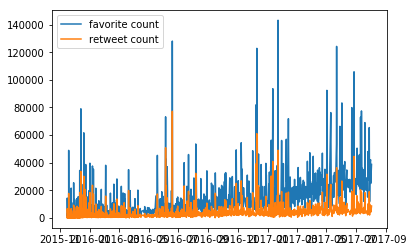

In [236]:
fig, ax = plt.subplots()

line1, = ax.plot(twitter_archive.timestamp, twitter_archive.favorite_count, label='favorite count')
line2, = ax.plot(twitter_archive.timestamp, twitter_archive.retweet_count, label='retweet count')
ax.legend()
plt.show()


Text(0,0.5,'Favorite Count')

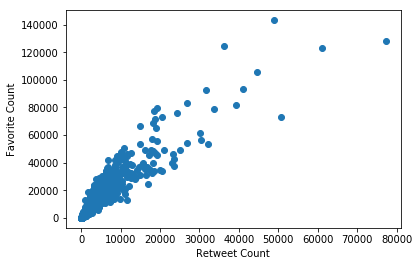

In [239]:
plt.scatter(twitter_archive.retweet_count, twitter_archive.favorite_count)
axes = plt.gca()
axes.set_xlabel('Retweet Count')
axes.set_ylabel('Favorite Count')


Text(0,0.5,'Favorite Count')

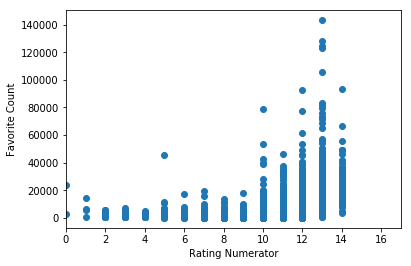

In [237]:
plt.scatter(twitter_archive.rating_numerator, twitter_archive.favorite_count)
axes = plt.gca()
axes.set_xlim([0,17])
axes.set_xlabel('Rating Numerator')
axes.set_ylabel('Favorite Count')
